<a href="https://colab.research.google.com/github/ApollineP/Group9/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> Support Vector Machine model for diabetes dataset </h1> </center>
        

<h5> The notebook will walk you through the different steps from preprocessing the data, to creating and finetuning our Support Vector Machine model, then evaluating it on the test set </h5>

# Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
)
from sklearn.metrics import (
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    matthews_corrcoef,
    accuracy_score,
    classification_report
    
)
from sklearn import svm
from sklearn import metrics
from pandas import read_csv
from pandas import set_option
from tensorflow import keras
import seaborn as sns
from google.colab import files

# Preprocessing

In [ ]:
def preprocess(df):
  df['bmi_group'] = pd.cut(df['BMI'], (0, 16, 18.5, 25, 30, 35, 40, np.inf), labels=[1, 2, 3, 4, 5, 6, 7])
  df.BMI = df['bmi_group']
  df.drop('bmi_group', axis=1, inplace=True)
  df.BMI = df.BMI.astype('float')
  X = df[df.columns[1:]]
  y = df[df.columns[0]]
  return X,y

In [ ]:
# files.upload()
dataset_wfs = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# with all features
X_wfs, y_wfs = preprocess(dataset_wfs)
X_train_wfs, X_test_wfs, y_train_wfs, y_test_wfs = train_test_split(X_wfs, y_wfs, random_state=42)
X_train_wfs, X_val_wfs, y_train_wfs, y_val_wfs = train_test_split(X_train_wfs, y_train_wfs, test_size=0.10, random_state=42)

In [ ]:
dataset_7 = dataset_wfs.drop(columns=['CholCheck','Smoker','PhysActivity','Fruits','Veggies','AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','Sex','Age','Education','Income'], axis=1, inplace=False)
# with 7 important features
X_7, y_7 = preprocess(dataset_7)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, random_state=42)
X_train_7, X_val_7, y_train_7, y_val_7 = train_test_split(X_train_7, y_train_7, test_size=0.10, random_state=42)

In [ ]:
dataset_4 = dataset_wfs.drop(columns=['CholCheck','Smoker','PhysActivity','Fruits','Veggies','AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','Sex','Age','Education','Income','HvyAlcoholConsump','HeartDiseaseorAttack','DiffWalk'], axis=1, inplace=False)
# with 4 most important features
X_4, y_4 = preprocess(dataset_4)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=42)
X_train_4, X_val_4, y_train_4, y_val_4 = train_test_split(X_train_4, y_train_4, test_size=0.10, random_state=42)

One hot encoding the data

In [ ]:
colTrans = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_wfs_trans = colTrans.fit_transform(X_train_wfs)
X_test_wfs_trans = colTrans.transform(X_test_wfs)
X_train_7_trans = colTrans.fit_transform(X_train_7)
X_test_7_trans = colTrans.transform(X_test_7)
X_train_4_trans = colTrans.fit_transform(X_train_4)
X_test_4_trans = colTrans.transform(X_test_4)

# Model

## Kernel experiments
This experiment aims to find the best kernel to use

In [ ]:
#poly Kernel
kernels = ["linear", "rbf", "poly", "sigmoid"]
for kernel in kernels:
  #Create a svm Classifier
  clf = svm.SVC(kernel=kernel)
  #Train the model using the training sets
  clf.fit(X_train_wfs_trans, y_train_wfs)
  #Predict the response for test dataset
  y_pred = clf.predict(X_test_wfs_trans)

  conf_mat_wfs = confusion_matrix(y_test_wfs,y_pred)
  sensitivity_wfs = conf_mat_wfs[1,1] / (conf_mat_wfs[0,1] + conf_mat_wfs[1,1])

  print("Sensitivity: ",sensitivity_wfs)
  print("Accuracy:",metrics.accuracy_score(y_test_wfs, y_pred))
  print("MCC:", metrics.matthews_corrcoef(y_test_wfs, y_pred))
  print("\n")
  print("Classification Report:")
  print(classification_report(y_test_wfs,y_pred))

  ax = sns.heatmap(confusion_matrix(y_test_wfs, y_pred), annot=True, cmap='Blues')

  ax.set_title(f'Kernel: {kernel}');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()
  print("------------------------------------------")

## feature experiments
The model will be trained on different subsets of the dataset, and on the whole dataset

Sensitivity:  0.7254048582995951
Accuracy: 0.7516550670514344
MCC: 0.5067693070119464


Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.74      8830
         1.0       0.73      0.81      0.77      8843

    accuracy                           0.75     17673
   macro avg       0.76      0.75      0.75     17673
weighted avg       0.76      0.75      0.75     17673



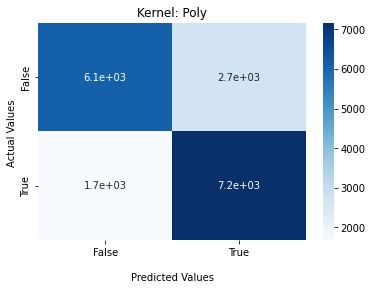

In [ ]:
#Poly Kernel without feature selection (wfs)


#Create a svm Classifier
clf = svm.SVC(kernel='poly')
#Train the model using the training sets
clf.fit(X_train_wfs_trans, y_train_wfs)
#Predict the response for test dataset
y_pred_wfs = clf.predict(X_test_wfs_trans)

conf_mat_wfs = confusion_matrix(y_test_wfs,y_pred_wfs)
sensitivity_wfs = conf_mat_wfs[1,1] / (conf_mat_wfs[0,1] + conf_mat_wfs[1,1])


print("Sensitivity: ",sensitivity_wfs)
print("Accuracy:",metrics.accuracy_score(y_test_wfs, y_pred_wfs))
print("MCC:", metrics.matthews_corrcoef(y_test_wfs, y_pred_wfs))
print("\n")
print("Classification Report:")
print(classification_report(y_test_wfs,y_pred_wfs))

ax = sns.heatmap(confusion_matrix(y_test_wfs,y_pred_wfs), annot=True, cmap='Blues')

ax.set_title('Kernel: Poly');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Sensitivity:  0.6913022113022113
Accuracy: 0.7199117297572568
MCC: 0.4448451164708325


Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.70      8830
         1.0       0.69      0.80      0.74      8843

    accuracy                           0.72     17673
   macro avg       0.73      0.72      0.72     17673
weighted avg       0.72      0.72      0.72     17673



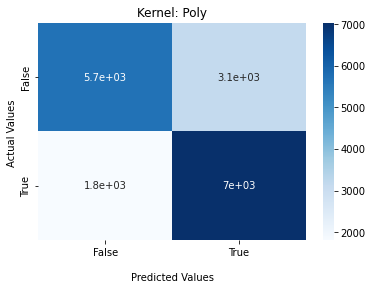

In [ ]:
#Poly Kernel with 7 features


#Create a svm Classifier
clf = svm.SVC(kernel='poly')
#Train the model using the training sets
clf.fit(X_train_7_trans, y_train_7)
#Predict the response for test dataset
y_pred_7 = clf.predict(X_test_7_trans)

conf_mat_7 = confusion_matrix(y_test_7,y_pred_7)
sensitivity_7 = conf_mat_7[1,1] / (conf_mat_7[0,1] + conf_mat_7[1,1])


print("Sensitivity: ",sensitivity_7)
print("Accuracy:",metrics.accuracy_score(y_test_7, y_pred_7))
print("MCC:", metrics.matthews_corrcoef(y_test_7, y_pred_7))

print("\n")
print("Classification Report:")
print(classification_report(y_test_7, y_pred_7))

ax = sns.heatmap(confusion_matrix(y_test_7, y_pred_7), annot=True, cmap='Blues')

ax.set_title('Kernel: Poly');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Sensitivity:  0.6866193761539209
Accuracy: 0.7169693883324846
MCC: 0.43981684167731144


Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69      8830
         1.0       0.69      0.80      0.74      8843

    accuracy                           0.72     17673
   macro avg       0.72      0.72      0.72     17673
weighted avg       0.72      0.72      0.72     17673



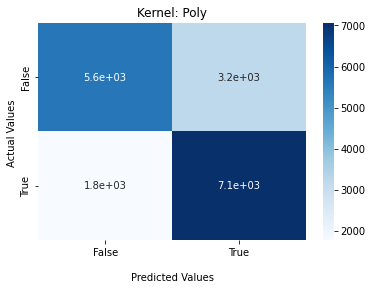

In [ ]:
#Poly Kernel with 4 features


#Create a svm Classifier
clf = svm.SVC(kernel='poly')
#Train the model using the training sets
clf.fit(X_train_4_trans, y_train_4)
#Predict the response for test dataset
y_pred_4 = clf.predict(X_test_4_trans)

conf_mat_4 = confusion_matrix(y_test_4,y_pred_4)
sensitivity_4 = conf_mat_4[1,1] / (conf_mat_4[0,1] + conf_mat_4[1,1])


print("Sensitivity: ",sensitivity_4)
print("Accuracy:",metrics.accuracy_score(y_test_4, y_pred_4))
print("MCC:", metrics.matthews_corrcoef(y_test_4, y_pred_4))
print("\n")
print("Classification Report:")
print(classification_report(y_test_4, y_pred_4))

ax = sns.heatmap(confusion_matrix(y_test_4, y_pred_4), annot=True, cmap='Blues')

ax.set_title('Kernel: Poly');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# visualize the different kernels by plotting BMI and PhysHlth

X = X_train_4[['BMI', 'PhysHlth']]  
                      
X = X.to_numpy()
y = y_train_4.to_numpy()

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
sig_svc = svm.SVC(kernel='sigmoid',C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with sigmoid kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, sig_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('BMI')
    plt.ylabel('PhysHlth')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()